# Contextualização 
Análise de dados coletados do sol

https://www.sidc.be/SILSO/DATA/SN_d_tot_V2.0.txt

Faça um gráfico dos valores diários de SSN, sobrepostos com médias mensais e curvas suavizadas mensais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [2]:
file = "https://www.sidc.be/SILSO/DATA/SN_d_tot_V2.0.txt"
df = pd.read_csv(file,encoding='utf-8',sep='\s+', error_bad_lines=False) 

df

/var/folders/48/9j82btmj24b8w65xd01ctfsr0000gq/T/ipykernel_58381/999512587.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file,encoding='utf-8',sep='\s+', error_bad_lines=False)
Skipping line 75332: expected 7 fields, saw 8
Skipping line 75333: expected 7 fields, saw 8
Skipping line 75334: expected 7 fields, saw 8
Skipping line 75335: expected 7 fields, saw 8
Skipping line 75336: expected 7 fields, saw 8
Skipping line 75337: expected 7 fields, saw 8
Skipping line 75338: expected 7 fields, saw 8
Skipping line 75339: expected 7 fields, saw 8
Skipping line 75340: expected 7 fields, saw 8
Skipping line 75341: expected 7 fields, saw 8
Skipping line 75342: expected 7 fields, saw 8
Skipping line 75343: expected 7 fields, saw 8
Skipping line 75344: expected 7 fields, saw 8
Skipping line 75345: expected 7 fields, saw 8
Skipping line 75346: expected 7 fields, saw 8
Skipping line 7

,1818,1,01,1818.001,-1,-1.0,0
0,1818,1,2,1818.004,-1,-1.0,0
1,1818,1,3,1818.007,-1,-1.0,0
2,1818,1,4,1818.010,-1,-1.0,0
3,1818,1,5,1818.012,-1,-1.0,0
4,1818,1,6,1818.015,-1,-1.0,0
...,...,...,...,...,...,...,...
75325,2024,3,27,2024.236,113,19.9,32
75326,2024,3,28,2024.239,98,13.2,38
75327,2024,3,29,2024.242,79,12.1,40
75328,2024,3,30,2024.245,51,10.4,35


In [3]:
df.columns = ['Gregorian Year', 'Gregorian Month', 'Gregorian Day', 'Decimal date', 'Estimated Sunspot Number', 'Estimated Standard Deviation', 'Number of Stations calculated']

df

,Gregorian Year,Gregorian Month,Gregorian Day,Decimal date,Estimated Sunspot Number,Estimated Standard Deviation,Number of Stations calculated
0,1818,1,2,1818.004,-1,-1.0,0
1,1818,1,3,1818.007,-1,-1.0,0
2,1818,1,4,1818.010,-1,-1.0,0
3,1818,1,5,1818.012,-1,-1.0,0
4,1818,1,6,1818.015,-1,-1.0,0
...,...,...,...,...,...,...,...
75325,2024,3,27,2024.236,113,19.9,32
75326,2024,3,28,2024.239,98,13.2,38
75327,2024,3,29,2024.242,79,12.1,40
75328,2024,3,30,2024.245,51,10.4,35


(2012.0, 2025.0)

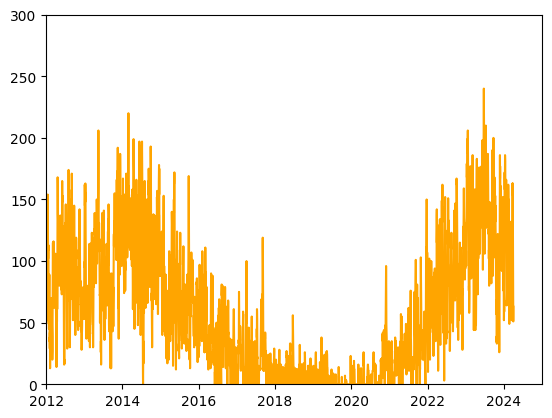

In [11]:
year = df['Gregorian Year']
month = df['Gregorian Month']
day = df['Gregorian Day']
decimal_date = df['Decimal date']
estimated_sunspot_number = df['Estimated Sunspot Number']

plt.figure()
plt.plot(decimal_date,estimated_sunspot_number, color = "orange")

plt.ylim(0,300)
plt.xlim(2012,2025)


O método pandas.DataFrame.rolling cria uma janela deslizante ("rolling window") sobre uma série ou DataFrame. Ele é utilizado para aplicar funções agregadas (como média, soma, variância, etc.) em subconjuntos contínuos de dados ao longo de um eixo. A janela pode ser configurada com um tamanho fixo e pode desconsiderar valores nulos.


df['media_movel'] = df['coluna'].rolling(window=3).mean()

Isso calculará a média dos últimos 3 valores consecutivos em cada linha.

In [5]:
print(len(df['Estimated Sunspot Number']))

75330


In [6]:
media_sunspot = df['Estimated Sunspot Number'].rolling(window=365).mean()

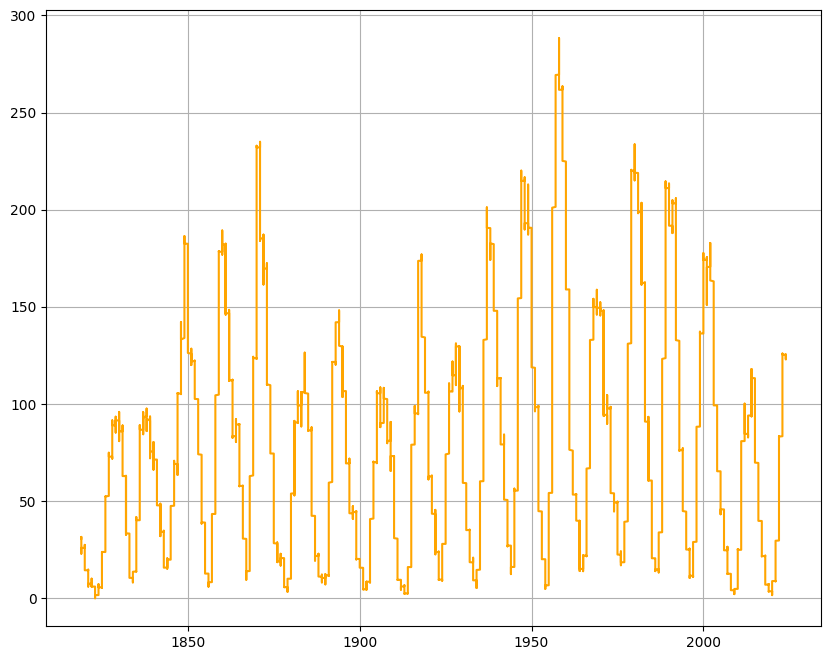

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.grid()

ax.plot(year,media_sunspot, color = "orange")
#ax.scatter(year,media_sunspot,zorder=0.1, color = "orange")

(2012.0, 2025.0)

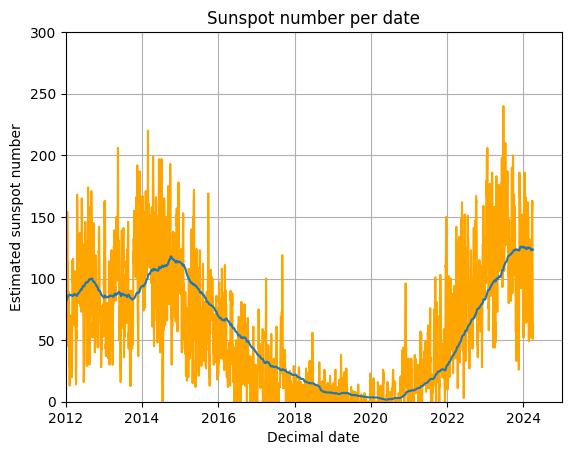

In [12]:
plt.figure()

plt.title("Sunspot number per date")

plt.xlabel("Decimal date")
plt.ylabel("Estimated sunspot number")

plt.grid()
plt.plot(decimal_date,estimated_sunspot_number, color = "orange")
plt.plot(decimal_date, media_sunspot)

plt.ylim(0,300)
plt.xlim(2012,2025)

In [137]:
def smooth(scalars, weight = 0.8):  # Weight between 0 and 1
    return [scalars[i] * weight + (1 - weight) * scalars[i+1] for i in range(len(scalars)) if i < len(scalars)-1]

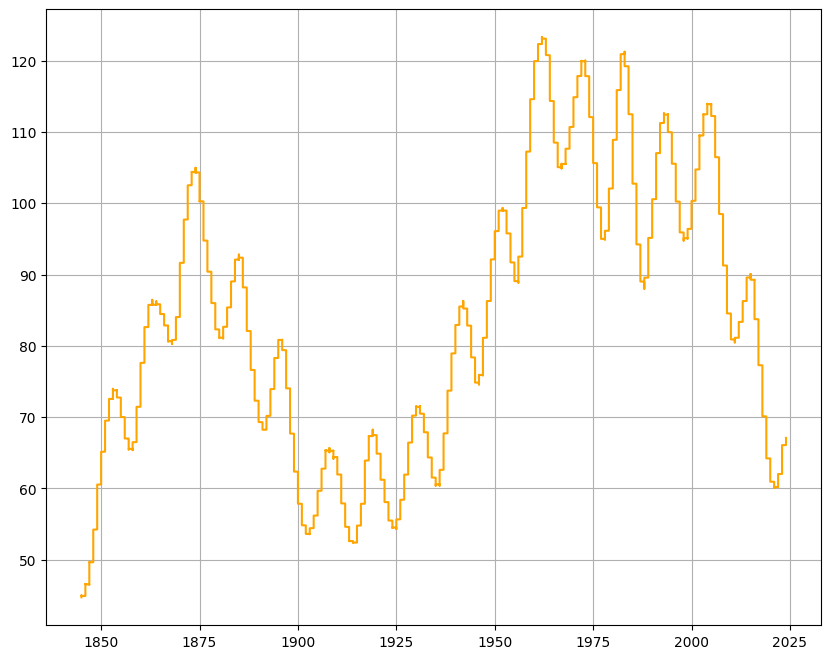

In [138]:
#lin 2012 - 2025
media_smoothed = smooth(media_sunspot) 

fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.grid()

ax.plot(year[:-1],media_smoothed, color = "orange")

(2012.0, 2025.0)

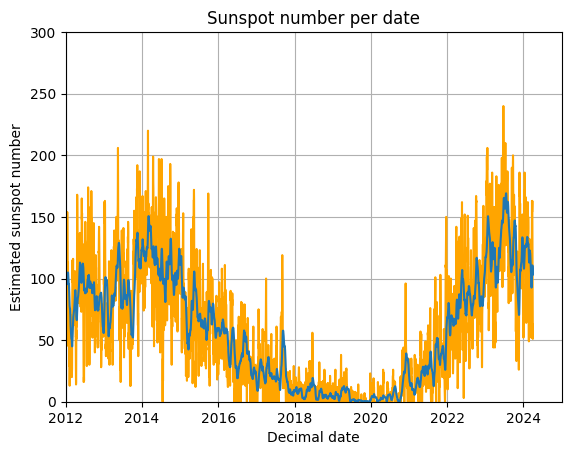

In [151]:
media_sunspot_month = df['Estimated Sunspot Number'].rolling(window=30).mean()

plt.figure()

plt.title("Sunspot number per date")

plt.xlabel("Decimal date")
plt.ylabel("Estimated sunspot number")

plt.grid()
plt.plot(decimal_date,estimated_sunspot_number, color = "orange")
plt.plot(decimal_date, media_sunspot_month)

plt.ylim(0,300)
plt.xlim(2012,2025)

In [176]:
# transformar o tempo em Date
import datetime

year_int = pd.to_numeric(year, errors='coerce')
month_int = pd.to_numeric(month, errors='coerce')
day_int = pd.to_numeric(day, errors='coerce')

# https://datatofish.com/strings-to-datetime-pandas/

#df['data'] = pd.to_datetime(df[['year', 'month', 'day']])

#df['date_format'] = date(year_int, month_int, day_int)

# group by 